In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

customers=pd.read_csv('/content/drive/MyDrive/Data Science Project/Customers.csv')
transactions=pd.read_csv('/content/drive/MyDrive/Data Science Project/Transactions.csv')

Mounted at /content/drive


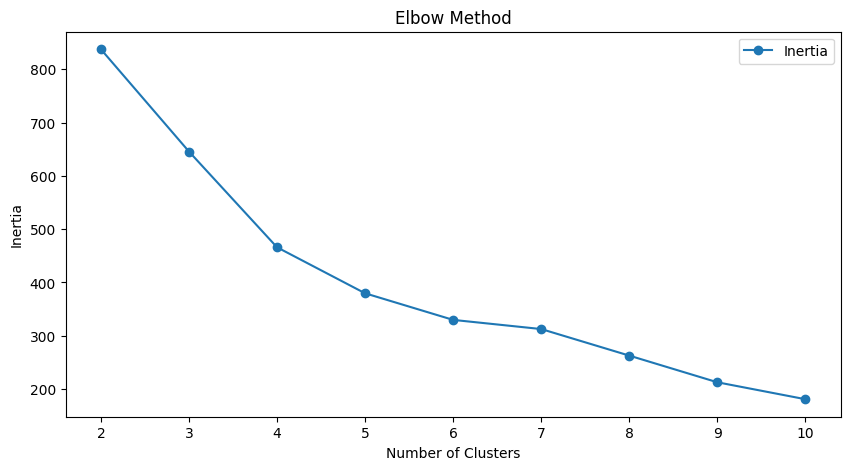

In [2]:
data = transactions.merge(customers, on='CustomerID', how='inner')
customer_summary = data.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum',
    'TransactionID': 'count'
}).rename(columns={
    'Quantity': 'TotalQuantity',
    'TotalValue': 'TotalSpend',
    'TransactionID': 'TransactionCount'
}).reset_index()
customer_summary = customer_summary.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left')
customer_summary = pd.get_dummies(customer_summary, columns=['Region'], drop_first=True)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_summary.drop(columns=['CustomerID']))

inertia = []
db_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    db_scores.append(davies_bouldin_score(scaled_data, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia, marker='o', label='Inertia')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.legend()
plt.show()

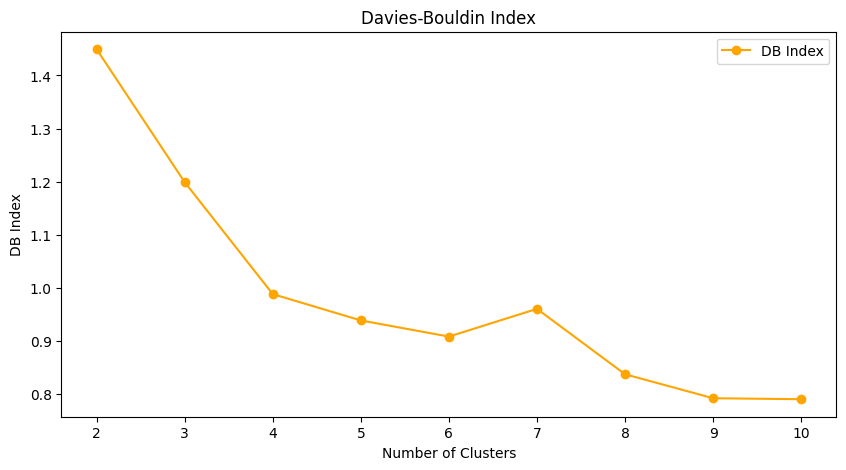

In [3]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), db_scores, marker='o', label='DB Index', color='orange')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')
plt.legend()
plt.show()

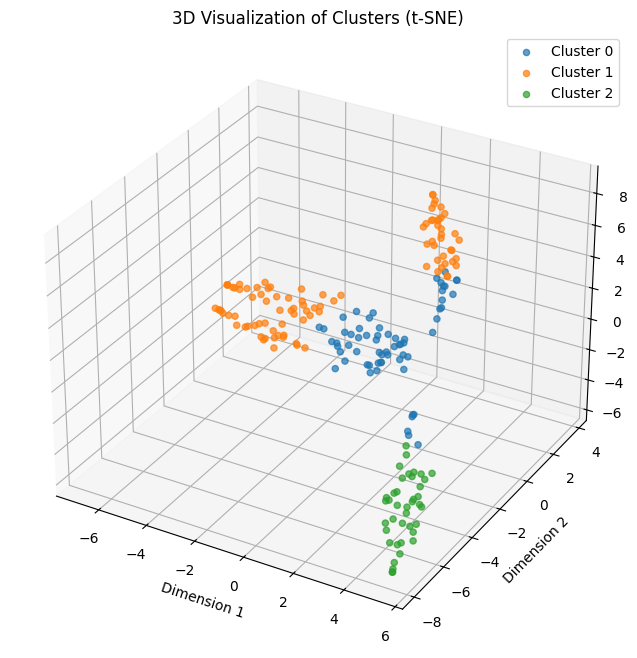

In [17]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, random_state=42)
reduced_data_3d = tsne.fit_transform(scaled_data)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster in range(optimal_k):
    ax.scatter(reduced_data_3d[clusters == cluster, 0],
               reduced_data_3d[clusters == cluster, 1],
               reduced_data_3d[clusters == cluster, 2],
               label=f'Cluster {cluster}', alpha=0.7)
ax.set_title('3D Visualization of Clusters (t-SNE)')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.legend()
plt.show()

In [18]:
silhouette_avg = silhouette_score(scaled_data, clusters)
db_index = davies_bouldin_score(scaled_data, clusters)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {db_index}')

Silhouette Score: 0.31368593785338295
Davies-Bouldin Index: 1.1988522183883534


In [19]:
customer_summary.to_csv('Customer_Segments.csv', index=False)
print("Processed Data saved as 'Customer_Segment.csv'.")

Processed Data saved as 'Customer_Segment.csv'.
